In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/USA_Housing.csv")
data.head()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
#input
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].values

#output
y = data['Price'].values

In [ ]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
#we need to do data scaling(normalization) 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x) #normalization
x

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [ ]:
x.shape

(5000, 5)

In [ ]:
# splitting the data into training and correction samples

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.9,random_state=0)

In [ ]:
ytrain

array([1734814.16032565, 1016187.10365218, 1156853.36451225, ...,
       1202992.88412315,  842985.85285497, 1571253.53147505])

In [ ]:
# Model building

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Model training

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.coef_ # slope value (m) in the linear regression

array([2.16080539e+01, 1.65362679e+05, 1.20033188e+05, 2.26555888e+03,
       1.52580905e+01])

In [ ]:
model.intercept_ # intercept value (c)

-2637728.6827535555

In [ ]:
ypred = model.predict(xtest)
ypred

In [ ]:
df = pd.DataFrame()
df['Y_Actual'] = ytest
df['Y_pred'] = ypred
df

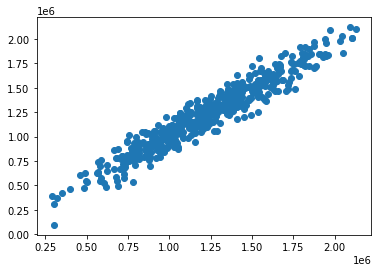

In [ ]:
plt.scatter(ytest,ypred) 
#shows a linar relation between our predicted and actual data
plt.show()

In [ ]:
# R square / R2 score

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9213680850207445

In [ ]:
model.predict([[20,20000,10,5,50000]])[0] 
# 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
# 'Avg. Area Number of Bedrooms', 'Area Population'

3309154748.58674

In [ ]:
#Linear regression

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
x1 = data[['YearsExperience']].values
y1 = data[['Salary']].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,train_size=0.9,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(xtrain1,ytrain1)

LinearRegression()

In [ ]:
ypred1 = model.predict(xtest1)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest1,ypred1)
r2

0.9817404960196033

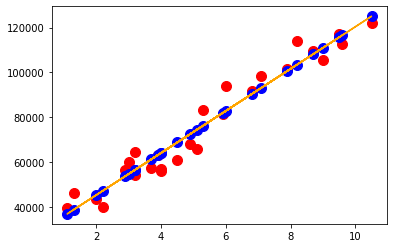

In [ ]:
plt.scatter(xtrain1,ytrain1,color='red',s=100)
plt.scatter(xtrain1,model.predict(xtrain1),color='blue',s=100)
plt.plot(xtrain1,model.predict(xtrain1),color='orange')
plt.show()

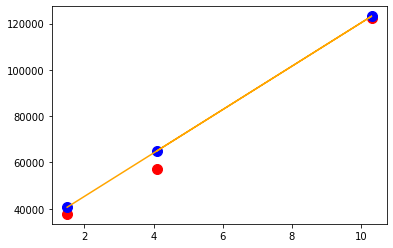

In [ ]:
plt.scatter(xtest1,ytest1,color='red',s=100)
plt.scatter(xtest1,model.predict(xtest1),color='blue',s=100)
plt.plot(xtest1,model.predict(xtest1),color='orange')
plt.show()

In [ ]:
# Trying to increase accuracy

In [ ]:
accuracy = []
for i in range(10000):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.9,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain,ytrain)
  ypred = model1.predict(xtest)
  r2 = r2_score(ytest,ypred)
  accuracy.append(r2)

In [ ]:
np.max(accuracy)

0.9409322381248273

In [ ]:
np.argmax(accuracy)

7260

In [ ]:
### Save the model
import joblib
joblib.dump(model,'house.pkl')

['house.pkl']

NEW MODEL

In [ ]:
### test a new sample with saved model
mymodel = joblib.load('house.pkl')

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data.shape

(30, 2)

In [ ]:
x1 = data[['YearsExperience']].values
y1 = data[['Salary']].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,train_size=0.7,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(xtrain1,ytrain1)

LinearRegression()

In [ ]:
ypred1 = model.predict(xtest1)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest1,ypred1)
r2

0.9740993407213511

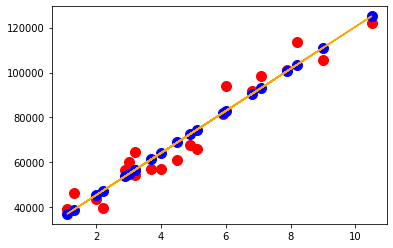

In [ ]:
plt.scatter(xtrain1,ytrain1,color='red',s=100)
plt.scatter(xtrain1,model.predict(xtrain1),color='blue',s=100)
plt.plot(xtrain1,model.predict(xtrain1),color='orange')
plt.show()

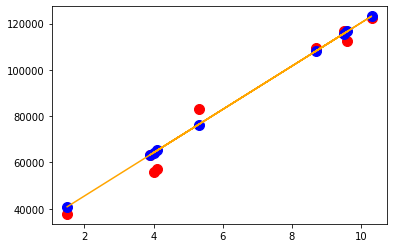

In [ ]:
plt.scatter(xtest1,ytest1,color='red',s=100)
plt.scatter(xtest1,model.predict(xtest1),color='blue',s=100)
plt.plot(xtest1,model.predict(xtest1),color='orange')
plt.show()
